In [1]:
import numpy as np
from scipy.optimize import approx_fprime
import sympy as sy

## Вычислить вектор градиента и матрицу Гессе для функции в точке M=(2,1,1)

In [2]:
x1, x2, x3 = sy.symbols("x1 x2 x3")
f = 2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3
fx1 = sy.diff(f, x1)
fx2 = sy.diff(f, x2)
fx3 = sy.diff(f, x3)

In [3]:
#вектор градиента 
def gradi(m1, m2, m3):
    x = fx1.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3) 
    y = fx2.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    z = fx3.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    gr = np.array([x, y, z])
    return gr

In [4]:
gradi(2, 1, 1)

array([21.0, -7.00, 4.00], dtype=object)

In [10]:
fx1_2_diag = sy.diff(fx1, x1)
fx2_2_diag = sy.diff(fx2, x2)
fx3_2_diag = sy.diff(fx3, x3)

fx1_2_12 = sy.diff(fx1, x2)
fx2_2_13 = sy.diff(fx1, x3)
fx2_2_23 = sy.diff(fx2, x3)

In [15]:
#матрица Гессе
def hessian(m1, m2, m3):
    x11 = fx1_2_diag.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3) 
    x22 = fx2_2_diag.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    x33 = fx3_2_diag.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    
    x12 = fx1_2_12.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    x13 = fx2_2_13.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    x23 = fx2_2_23.evalf(subs={x1:m1, x2:m2, x3 : m3}, n =3)
    
    hes = np.array([[x11,x12,x13], [x12,x22,x23], [x13,x23,x33]])
    return hes

In [16]:
hessian(2, 1, 1)

array([[24.0, -3.00, 0],
       [-3.00, -6.00, 4.00],
       [0, 4.00, 4.00]], dtype=object)

## Постройте график трехмерный график функции

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter

In [40]:
def funct1(x1,x2):
    return x2**2 - x2*x1**2 + 2*x1*x2

/var/folders/68/r9lzjh3n2cvddm9j2k_jrd400000gn/T/ipykernel_11018/3535439035.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


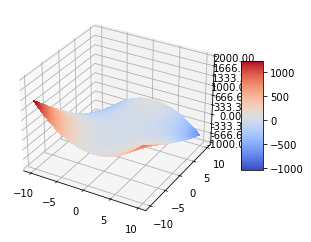

In [46]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#data
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)

X,Y = np.meshgrid(X,Y)

Z = funct1(X, Y)

#plot the surface
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

#customize axis Z
ax.set_zlim(-1000, 2000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#add color bar
fig.colorbar(surf, shrink=0.5, aspect = 5)

plt.show()